In [ ]:
import pandas as pd
import matplotlib
import seaborn as sns
%matplotlib inline
df = pd.read_csv('train (2).csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Всего выживших: 

In [ ]:
len(df[df['Survived']==1])


342

Статистика выживших:

In [ ]:
newdf=df[df.Survived == 1][['Pclass','Name','Sex','Cabin','Fare','Embarked','SibSp']]

Одинокие или с родственниками?

In [ ]:
newdf.groupby('SibSp').size()

SibSp
0    210
1    112
2     13
3      4
4      3
dtype: int64

Сколько мужчин и женщин

In [ ]:
newdf.groupby('Sex').size()

Sex
female    233
male      109
dtype: int64

С какого порта посадки:

In [ ]:
newdf.groupby('Embarked').size()

Embarked
C     93
Q     30
S    217
dtype: int64

По цене билета:

In [ ]:
newdf['Fare'].describe()

count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64

Выживших в процентах в пределах своего класса:

In [ ]:
def survival_perc(var1,var2):
  return round(var2*100/var1,1)

survival_perc(df.groupby('Pclass').size(),newdf.groupby('Pclass').size())

Pclass
1    63.0
2    47.3
3    24.2
dtype: float64

Выживших в процентах по классам:

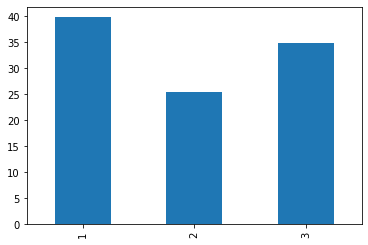

In [ ]:
df[df.Survived==1].Pclass.value_counts(normalize = True).mul(100).round(1).sort_index().sort_index().plot.bar()

Изначальное распределение по классам в процентах:

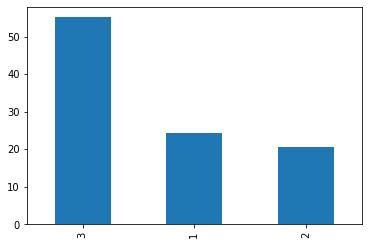

In [ ]:
df.Pclass.value_counts(normalize = True).mul(100).round(1).sort_index().plot.bar()

Количество выживших мужчин и женщин из разных портов отправления:

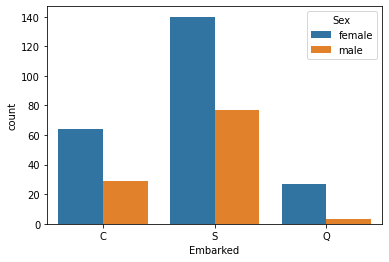

In [ ]:
sns.countplot(data=df[df.Survived==1], hue='Sex',x='Embarked')

Сколько денег на билет могли позволить себе выжившие:

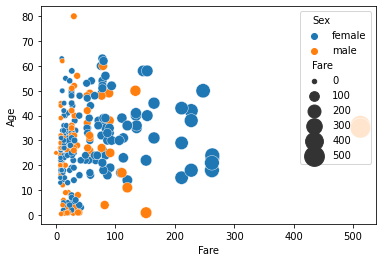

In [ ]:
sns.scatterplot(data=df[df.Survived==1], y='Age',x='Fare',hue='Sex', size='Fare', sizes=(20,400),legend="auto")

Сколько родственников у спасшихся мужчин и женщин:

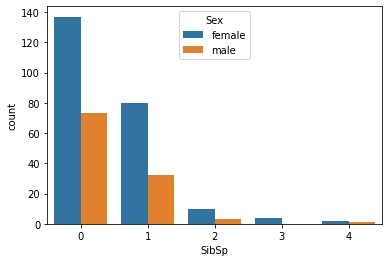

In [ ]:
sns.countplot(data=newdf, x = 'SibSp', hue='Sex')